In [1]:
from alpha_vantage.timeseries import *
import pandas as pd
import numpy as np
from sklearn import metrics 
import plotly.express as px
import plotly.graph_objects as go

In [2]:
apikey = 'IITYZ49L2LBBLXKG'
ts=TimeSeries(key=apikey,output_format='pandas')
df=ts.get_weekly('MSFT')
df=df[0]
df=df.reset_index()
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-10-17,235.820,238.96,235.135,237.53,28142268.0
1,2022-10-14,233.050,237.24,219.130,228.56,154871905.0
2,2022-10-07,235.410,250.58,233.170,234.24,142125397.0
3,2022-09-30,237.045,242.33,232.730,232.90,146921666.0
4,2022-09-23,242.465,247.66,235.200,237.92,147215927.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1198 non-null   datetime64[ns]
 1   1. open    1198 non-null   float64       
 2   2. high    1198 non-null   float64       
 3   3. low     1198 non-null   float64       
 4   4. close   1198 non-null   float64       
 5   5. volume  1198 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 56.3 KB


In [4]:
df.shape

(1198, 6)

In [5]:
df.isnull().sum()

date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [6]:
df.isna().any()

date         False
1. open      False
2. high      False
3. low       False
4. close     False
5. volume    False
dtype: bool

In [7]:
df.describe()

,1. open,2. high,3. low,4. close,5. volume
count,1198.000000,1198.000000,1198.000000,1198.000000,1.198000e+03
mean,71.763511,73.785492,69.895015,71.991626,2.262917e+08
std,72.455613,74.443265,70.555690,72.716528,1.121715e+08
min,15.200000,16.400000,14.870000,15.280000,2.814227e+07
25%,27.300000,27.887500,26.815000,27.370000,1.418196e+08
50%,41.730000,42.885000,40.720000,41.945000,2.046083e+08
75%,73.012500,74.506250,71.915000,73.030000,2.898397e+08
max,344.620000,349.670000,335.430000,343.110000,8.797232e+08


In [8]:
print(len(df))

1198


In [9]:
px.line(df,x='date',y='1. open')

In [10]:
X = df[['1. open','2. high','3. low','5. volume']]
y= df['4. close']

In [11]:
X

,1. open,2. high,3. low,5. volume
0,235.820,238.96,235.135,28142268.0
1,233.050,237.24,219.130,154871905.0
2,235.410,250.58,233.170,142125397.0
3,237.045,242.33,232.730,146921666.0
4,242.465,247.66,235.200,147215927.0
...,...,...,...,...
1193,95.250,97.19,91.440,115003700.0
1194,90.120,97.12,89.500,142022200.0
1195,89.620,93.37,88.370,121834600.0
1196,88.250,88.50,84.370,147891900.0


In [12]:
y

0       237.53
1       228.56
2       234.24
3       232.90
4       237.92
         ...  
1193     93.87
1194     96.12
1195     91.12
1196     86.00
1197     89.19
Name: 4. close, Length: 1198, dtype: float64

In [13]:
from sklearn.model_selection import  train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [14]:
X_train.shape

(898, 4)

In [15]:
X_test.shape

(300, 4)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[-5.91121972e-01  8.72842282e-01  7.14130576e-01 -1.33262668e-09]
0.3599650112456487


In [19]:
predicted=regressor.predict(X_test)

In [20]:
print(X_test)

     1. open  2. high  3. low    5. volume
198   101.29   102.51   97.20  155142140.0
328    50.83    52.36   50.39  100950032.0
45    323.95   343.00  319.23  146125332.0
263    74.71    76.12   73.71   74782566.0
621    25.65    25.74   25.09  201275400.0
..       ...      ...     ...          ...
668    31.00    31.50   30.48  129036100.0
839    26.74    27.25   26.48  270058100.0
117   205.00   213.94  197.51  230978319.0
359    54.54    56.23   53.93  226060572.0
294    64.54    64.99   63.62  108727793.0

[300 rows x 4 columns]


In [21]:
predicted.shape

(300,)

In [22]:
dframe=pd.DataFrame(y_test,predicted)

In [23]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [24]:
dfr.head(50)

,Actual Price,Predicted Price
198,101.9300,99.167028
328,52.3000,51.865768
45,342.5400,336.028078
263,76.0000,75.176905
621,25.2500,25.313958
520,29.4998,29.555951
186,117.9400,117.410834
987,25.1100,25.022049
1107,66.8900,67.139206
1052,52.2200,52.791968


In [25]:
dfr=dfr.reset_index()

In [26]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            300 non-null    int64  
 1   Actual Price     300 non-null    float64
 2   Predicted Price  300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [27]:
dfr.drop(['index'],axis=1,inplace=True)

In [28]:
dfr

,Actual Price,Predicted Price
0,101.93,99.167028
1,52.30,51.865768
2,342.54,336.028078
3,76.00,75.176905
4,25.25,25.313958
...,...,...
295,30.48,31.124459
296,26.66,26.888607
297,201.30,206.655961
298,55.91,55.411902


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
graph=dfr.head(20)

<AxesSubplot: >

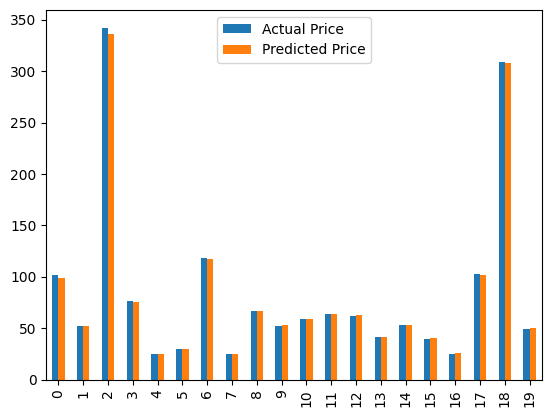

In [31]:
graph.plot(kind='bar')

In [32]:
px.bar(dfr.head(20),barmode='group')